<a href="https://colab.research.google.com/github/withjungjh/My-Neuromatch-Academy/blob/Python-tutorial/01_%EC%A0%95%EC%A7%84%ED%99%98_LIF_Neuron_Part_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

$$τ_m\frac{d}{dt}V(t)=E_L−V(t)+RI(t)$$
$$if\ V(t)≤V_{th}\ otherwise\ V(t)=V_{reset}$$

In [ ]:
t_max = 150e-3   # second
dt = 1e-3        # second
tau = 20e-3      # second
el = -60e-3      # milivolt
vr = -70e-3      # milivolt
vth = -50e-3     # milivolt
r = 100e6        # ohm
i_mean = 25e-11  # ampere

print(t_max, dt, tau, el, vr, vth, r, i_mean)

0.15 0.001 0.02 -0.06 -0.07 -0.05 100000000.0 2.5e-10


$$I(t) = I_{mean}(1+\sin(\frac{2\pi}{0.01}t))$$

In [ ]:
# for loop
# exercise 02
for step in range(10):
  t = step * dt
  i = i_mean * (1+np.sin(2*np.pi*t/0.01))
  print(i)

2.5e-10
3.969463130731183e-10
4.877641290737885e-10
4.877641290737885e-10
3.9694631307311837e-10
2.5000000000000007e-10
1.0305368692688176e-10
1.2235870926211617e-11
1.223587092621159e-11
1.0305368692688186e-10


In [ ]:
# section 1.4: print formatting
x = 3.14159265e-1
print(f"{x:.3f}")

0.314


In [ ]:
print(f"{x:.4e}") #exponential notation

3.1416e-01


In [ ]:
# exercise 03
step_end = 10
for step in range(step_end):
  t = step * dt
  i = i_mean * (1+np.sin(2*np.pi*t/0.01))
  print(f"{t:.3f}", f"{i:.4e}")

0.000 2.5000e-10
0.001 3.9695e-10
0.002 4.8776e-10
0.003 4.8776e-10
0.004 3.9695e-10
0.005 2.5000e-10
0.006 1.0305e-10
0.007 1.2236e-11
0.008 1.2236e-11
0.009 1.0305e-10


In [ ]:
# section 2.1: for loops
for step in [0,1,2]:
  print(step)

for step in range(3):
  print(step)

start = 0
end = 3
stepsize = 1

for step in range(start, end, stepsize):
  print(step)

0
1
2
0
1
2
0
1
2


$$\tau_m\frac{V(t+\Delta t) - V(t)}{\Delta t} = E_L - V(t) + R I(t)$$

$$V(t+\Delta t) = V(t) + \frac{\Delta t}{\tau_m}(E_L - V(t) + RI(t))$$

In [ ]:
# Coding Exercise 4: Stimulating membrane potential
setp_end = 10
v = el

for step in range(step_end):
  t = step * dt
  i = i_mean * (1+np.sin(2*np.pi*t/0.01))
  v = v + dt/tau*(el - v + r*i)
  print(f"{t:.3f}", f"{v:.4e}")

0.000 -5.8750e-02
0.001 -5.6828e-02
0.002 -5.4548e-02
0.003 -5.2381e-02
0.004 -5.0778e-02
0.005 -4.9989e-02
0.006 -4.9974e-02
0.007 -5.0414e-02
0.008 -5.0832e-02
0.009 -5.0775e-02


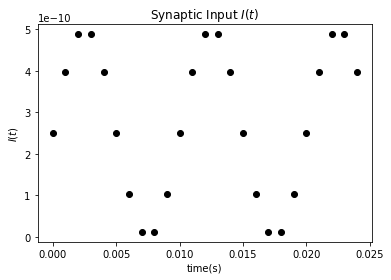

In [ ]:
# Coding Exercise 5: Plotting current
step_end = 25
plt.figure()
plt.title("Synaptic Input $I(t)$")
plt.xlabel("time(s)")
plt.ylabel("$I(t)$")

for step in range(step_end):
  t = step * dt
  i = i_mean * (1+np.sin(2*np.pi*t/0.01))
  plt.plot(t, i, "ko")

plt.show()

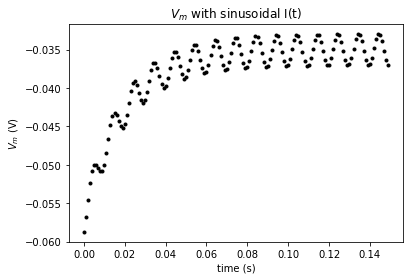

In [ ]:
# Coding Exercise 6: Plotting membrane potential
step_end = int(t_max/dt)
v = el
plt.figure()
plt.title("$V_m$ with sinusoidal I(t)")
plt.xlabel("time (s)")
plt.ylabel("$V_m$ (V)")

for step in range(step_end):
  t = step * dt
  i = i_mean * (1+np.sin(2*np.pi*t/0.01))
  v = v + dt/tau*(el - v + r*i)
  plt.plot(t, v, "k.")
plt.show()



In [ ]:
# section4: random synaptic input

synaptic input is random
$$I(t) = I_{mean}(1+0.1\sqrt{\frac{t_{max}}{\Delta t}}\xi(t)))\    with\ \xi(t)\sim U(-1,1)$$

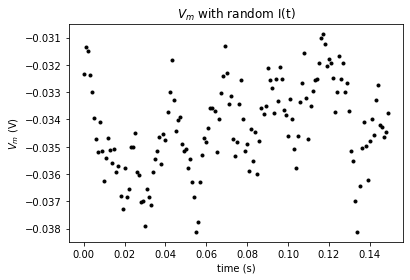

In [ ]:
#Coding Exercise 7: Adding randomness
np.random.seed(2020)
step_end = int(t_max/dt)

plt.figure()
plt.title("$V_m$ with random I(t)")
plt.xlabel("time (s)")
plt.ylabel("$V_m$ (V)")

for step in range(step_end):
  t = step * dt
  random_num = 2 * np.random.random() - 1 #np.random.uniform(-1,1)
  i = i_mean * (1+ 0.1 * (t_max/dt)**0.5 *random_num) # np.sqrt()
  v = v + dt/tau*(el - v + r*i)
  plt.plot(t, v, "k.")
plt.show()


왜 여기에서는 다른 데에서와는 다르게 난잡하게 배열이 되는 거지? 

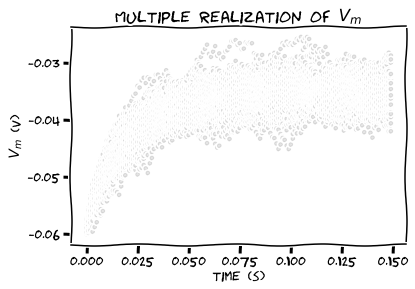

In [ ]:
# Section 5: List & ensemble statistics
# Coding Exercise 8: Storing simulation in lists
np.random.seed(2020)
step_end = int(t_max/dt)
n = 50

v_n = [el] * n

with plt.xkcd():
  plt.figure()
  plt.title("Multiple realization of $V_m$")
  plt.xlabel("time (s)")
  plt.ylabel("$V_m$ (V)")

  for step in range(step_end):
    t = step * dt
    for j in range(0, n):
      i = i_mean * (1+ 0.1 * (t_max/dt)**0.5 *np.random.uniform(-1,1)) # np.sqrt()
      v_n[j] = v_n[j] + dt/tau*(el - v_n[j] + r*i)
    plt.plot([t]*n, v_n,  "k.",alpha=0.1)

  plt.show()

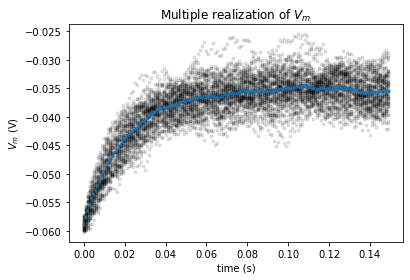

In [ ]:
# Coding Exercise9: Plotting sampel mean
np.random.seed(2020)
step_end = int(t_max/dt)
n = 50

v_n = [el] * n


plt.figure()
plt.title("Multiple realization of $V_m$")
plt.xlabel("time (s)")
plt.ylabel("$V_m$ (V)")

for step in range(step_end):
  t = step * dt
  for j in range(0, n):
    i = i_mean * (1+ 0.1 * (t_max/dt)**0.5 *np.random.uniform(-1,1)) # np.sqrt()
    v_n[j] = v_n[j] + dt/tau*(el - v_n[j] + r*i)
  v_mean = sum(v_n)/n
  plt.plot([t]*n, v_n,  "k.",alpha=0.1)
  plt.plot(t, v_mean, "C0.", alpha = 0.8)

plt.show()

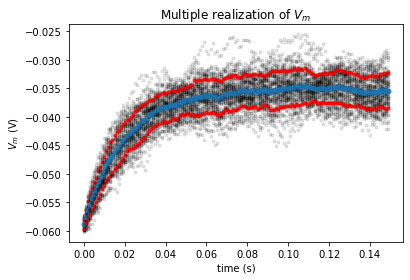

In [ ]:
# Coding Exercise 10: Plotting sample standard deviation

np.random.seed(2020)
step_end = int(t_max/dt)
n = 50

v_n = [el] * n


plt.figure()
plt.title("Multiple realization of $V_m$")
plt.xlabel("time (s)")
plt.ylabel("$V_m$ (V)")

for step in range(step_end):
  t = step * dt
  for j in range(0, n):
    i = i_mean * (1+ 0.1 * (t_max/dt)**0.5 *np.random.uniform(-1,1)) # np.sqrt()
    v_n[j] = v_n[j] + dt/tau*(el - v_n[j] + r*i)
  v_mean = sum(v_n)/n
  v_var_n = [(k-v_mean)**2 for k in v_n]
  v_var = sum(v_var_n)/(n-1)
  v_std = np.sqrt(v_var)

  plt.plot([t]*n, v_n,  "k.",alpha=0.1)
  plt.plot(t, v_mean, "C0.", alpha = 0.8, markersize=10)
  plt.plot(t, v_mean+v_std, "r.", alpha=0.8)
  plt.plot(t, v_mean-v_std, "r.", alpha=0.8)

plt.show()

<function matplotlib.pyplot.show>

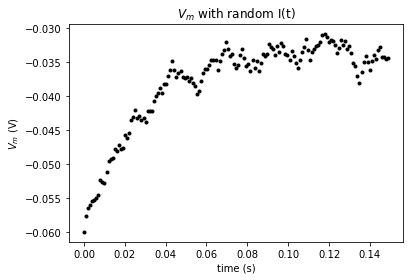

In [ ]:
# Section 6: Using Numpy
# Coding Exercise 11: Rewriting with numpy
np.random.seed(2020)
step_end = int(t_max/dt) - 1
t_range = np.linspace(0, t_max, num=step_end, endpoint=False)
v = el * np.ones(step_end)

i = i_mean * (1+ 0.1 * (t_max/dt)**0.5 *(2 * np.random.random(step_end) - 1)) #np.random.uniform 은 여기에서 에러남.
for step in range(1, step_end):
  v[step] = v[step - 1] + dt/tau * (el - v[step - 1] + r * i[step])

plt.figure()
plt.title("$V_m$ with random I(t)")
plt.xlabel("time (s)")
plt.ylabel("$V_m$ (V)")

plt.plot(t_range, v, "k.")
plt.show


왜 위 코드에서는 `np.random.uniform`은 에러가 났을까?

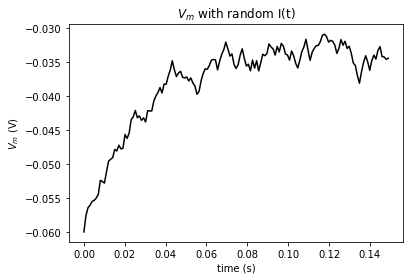

In [ ]:
# Coding Exercise 12
np.random.seed(2020)

step_end = int(t_max/dt) -1
t_range = np.linspace(0, t_max, num=step_end, endpoint=False)
v = el *np.ones(step_end)

i = i_mean * (1 + 0.1 * (t_max/dt)**0.5 * (2 *np.random.random(step_end) - 1))

for step, i_step in enumerate(i):
  if step==0:
    continue

  v[step] = v[step - 1] + dt/tau * (el - v[step - 1] + r * i[step]) 

plt.figure()
plt.title('$V_m$ with random I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

plt.plot(t_range, v, 'k')
plt.show()

In [ ]:
# Section 7: Aggregation
# Coding Exercise 13: Using 2d arrays


<class 'numpy.ndarray'>


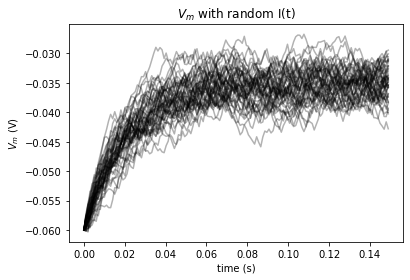

In [ ]:
np.random.seed(2020)

step_end = int(t_max/dt) -1
t_range = np.linspace(0, t_max, num=step_end, endpoint=False)
v_n = el * np.ones([n,step_end])

i = i_mean * (1 + 0.1 * (t_max/dt)**0.5 * (2 *np.random.random([n,step_end]) - 1))

for step in range(1, step_end):
  v_n[:, step] = v_n[:, step - 1] + dt/tau * (el - v_n[:, step - 1] + r * i[:, step]) 

plt.figure()
plt.title('$V_m$ with random I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

plt.plot(t_range, v_n.T, 'k', alpha = 0.3)
plt.show()

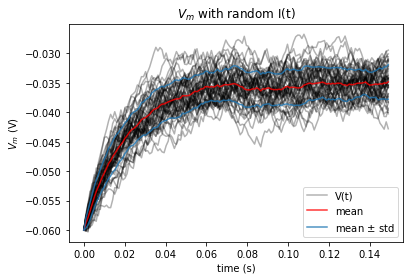

In [ ]:
# Coding Exercise 14: Plotting sample mean and standard deviation

np.random.seed(2020)

step_end = int(t_max/dt) -1
t_range = np.linspace(0, t_max, num=step_end, endpoint=False)
v_n = el * np.ones([n,step_end])

i = i_mean * (1 + 0.1 * (t_max/dt)**0.5 * (2 *np.random.random([n,step_end]) - 1))

for step in range(1, step_end):
  v_n[:, step] = v_n[:, step - 1] + dt/tau * (el - v_n[:, step - 1] + r * i[:, step])
  
v_mean = np.mean(v_n, axis=0)
v_std = np.std(v_n, axis=0)

plt.figure()
plt.title('$V_m$ with random I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

plt.plot(t_range, v_n.T, 'k', alpha = 0.3)
plt.plot(t_range, v_n[-1], 'k', alpha = 0.3, label = 'V(t)')
plt.plot(t_range, v_mean, 'r', alpha = 0.8, label = "mean")
plt.plot(t_range, v_mean + v_std, 'C0', alpha = 0.8)
plt.plot(t_range, v_mean - v_std, 'C0', alpha = 0.8, label = "mean $\pm$ std")

plt.legend()


plt.show()

계산 방향을 결정하는게 상당히 헷갈린다. 일단 nd.array에서의 shape은 the number of row, column 순으로 되어 있다. 
그리고 계산이 이루어지는 곳이 column이면 axis=0, row 내에서 계산이 이루어지면 axis=1이다. 전에 들었는데 새로 생긴 layer가 0이 된다고 그랬다. 그래서 원래 row가 있고 그 다음에 column, 그 다음 depth가 생기는 방식으로 진행되면서 depth(0), column(1), row(2) 이렇게 계산되는 것 같다. 3D array에서는.